# Environment setup

### Library preparation

In [11]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import pandas as pd
import pandas as pd
pd.set_eng_float_format(accuracy=1, use_eng_prefix=True)

import numpy as np

import os

import matplotlib.pyplot as plt

import qcodes as qc
from qcodes.dataset.plotting import plot_by_id, get_data_by_id, plot_dataset
from qcodes.dataset.data_set import load_by_id
from qcodes.instrument.parameter import Parameter


from si_prefix import si_format as SI

In [13]:
import sys 
sys.path.append('..\..\_jjtools')

# from Exps import *

from JJ_data_processing import read_opj_data, pbi, bpbi, show_df, update_df

from JJformulas import *
from meas_util import *

from JJmeasurement import *

### Database ini

In [14]:
SAMPLE = 'D059B6N5'

jj = JJmeas(sample = SAMPLE)

jj.db_connect()

# Sample discription and runid matrix

# Import from origin

In [9]:
Vmock = Parameter(name = 'Voltage', label = 'Voltage', unit = 'V')
Imock = Parameter(name = 'Current', label = 'Current', unit = 'A')

<IPython.core.display.Javascript object>


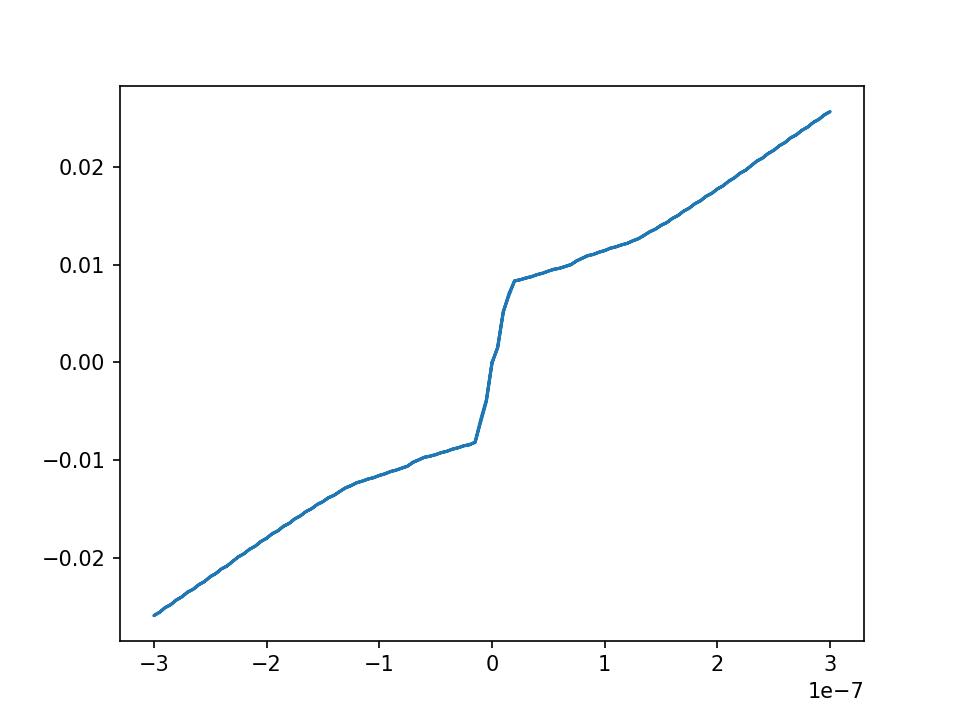

In [17]:
x, y = read_opj_data(cols = (4,5), preprint = True)

In [18]:
runid = jj.mock_meas( x = (Imock, x), y = (Vmock, y) , label = 'IVC coarse')

Starting experimental run with id: 2


# Report

## Overview IVC

<IPython.core.display.Javascript object>


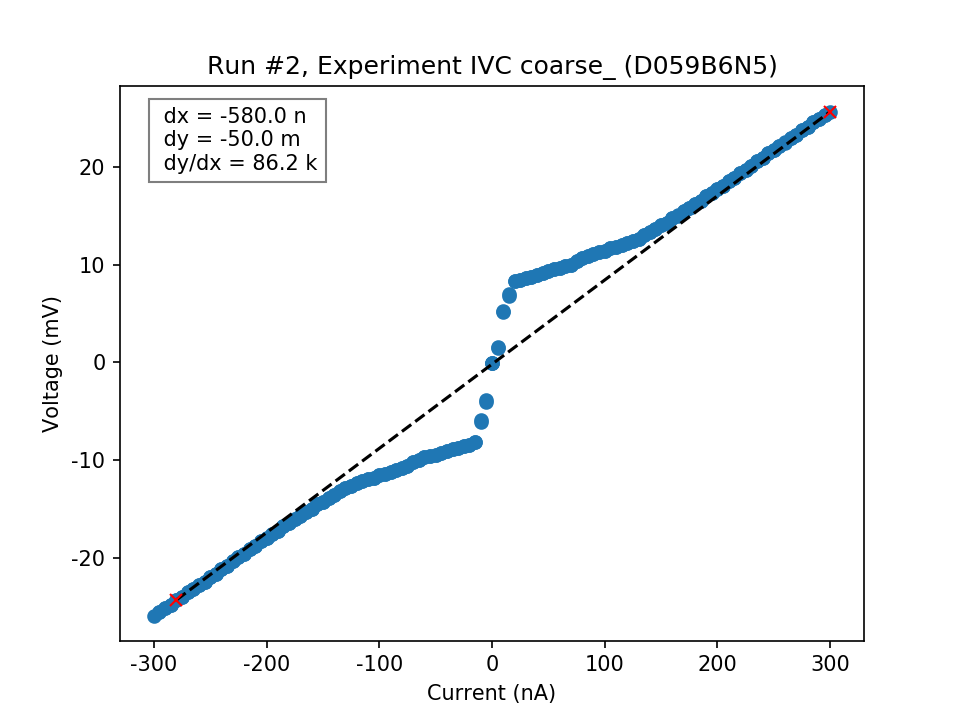

In [19]:
pbi(2, interactive = True)

In [20]:
Vg = 8.38e-3
Rn_tot = 86.2e3

## IVC fine scan

<IPython.core.display.Javascript object>


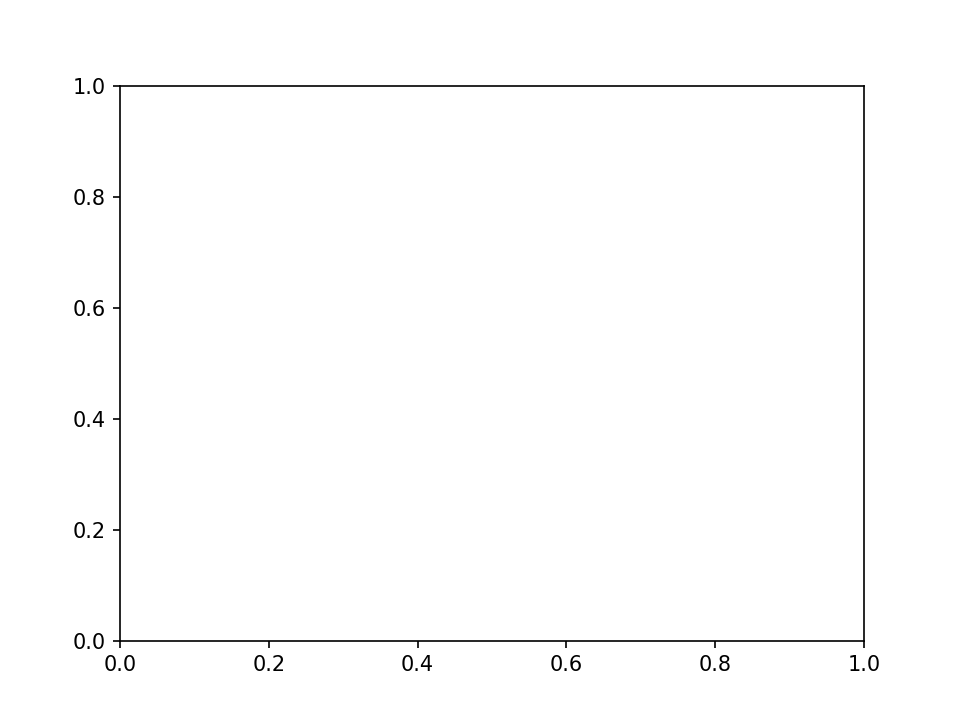

AttributeError: Unknown property ls

In [21]:
pbi(1, interactive = True)

In [22]:
Ro_tot = 80.35e3
Isw = 1.45e-9
N  = 30
Vo_tot = 133e-6

# Datatable update

In [23]:
ft = pd.read_excel("..\chain table.xlsx", index_col = 0)
show_df(ft, 
         find = SAMPLE
         )

,Ajj,Ec,Ej,Iab,Isw,N,Npar,Rn,Rn_tot,Ro,RoFF,Ro_tot,Vo_tot,dsgn,status,wp


In [24]:
ft = pd.read_excel("..\chain table.xlsx", index_col = 0)
ft = update_df(ft, SAMPLE, 
         
              {'Rn_tot'  : Rn_tot,
               'Ro_tot'  : Ro_tot,
               'Isw'     : Isw,
               'N'       : N,
               'Vo_tot'  : Vo_tot,
               'Npar'    : 2,
               'dsgn'    : 'Fin',
               'Ajj'     : 40e-15,
               'status'  : 'measd_lv'
             })

show_df(ft, 
       find = SAMPLE)

,Ajj,Ec,Ej,Iab,Isw,N,Npar,Rn,Rn_tot,Ro,RoFF,Ro_tot,Vo_tot,dsgn,status,wp
D059B6N5,40.0f,185.9m,2.4,98.9n,1.4n,30.0,2.0,2.9k,86.2k,2.7k,NaN,80.4k,133.0u,Fin,measd_lv,1.9


In [25]:
ft.to_excel("..\chain table.xlsx")
ft = pd.read_excel("..\chain table.xlsx", index_col = 0)
show_df(ft, 
         find = SAMPLE
         )

,Ajj,Ec,Ej,Iab,Isw,N,Npar,Rn,Rn_tot,Ro,RoFF,Ro_tot,Vo_tot,dsgn,status,wp
D059B6N5,40.0f,185.9m,2.4,98.9n,1.4n,30,2,2.9k,86.2k,2.7k,NaN,80.4k,133.0u,Fin,measd_lv,1.9
